# CIS7017 - Technology Dissertation
## Lloyd Bowen - st20158067

### Exploring the Impact of Social Media on Sponsorship and Branding in Esports

##### Importing Libraries and Datasets

In [1]:
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

pd.options.display.max_rows = 60 # default=60

import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
import os

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = './resources/bowenn.json'

import pyproj
import matplotlib.pyplot as plt
import plotly.io as pio

# pio.templates['bowen']= pio.templates['plotly']
# pio.templates['bowen'].update({
#     'layout_font_family': 'SF Pro Display'
# })

# pio.templates.default = 'bowen'

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from shapely.geometry import Point
from textblob import TextBlob
from google.cloud import translate_v2 as translate
from wordcloud import WordCloud

Here we have imported the various Python Libraries we will be using throughout this document.

pandas is used for general data analysis, geopandas is for geospatial data analysis, plotly and matplotlib are used for visualising the data by creating plots, geopy, pyproj and shapely are used for geolocating, textblob is used for sentiment analysis, google.cloud translate_v2 is used for translation, wordcloud is used for generating wordclouds

In [2]:
tweets=pd.read_csv('./datasets/g2-csgo-roll-81.csv')
tweets

,tweet_id,username,full_name,full_text,view_count,bookmark_count,favorite_count,reply_count,retweet_count,quote_count,...,normal_followers_count,followed_by,following,location,profile_banner_url,profile_url,avatar_url,verified,is_blue_verified,user_created_at
0,1.679560e+18,fyta_ow,fyta,@hanshimcd @wonderingsonny @CSGOEmpireV2 @Spar...,160,0,0,1,0,0,...,30,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/13419028...,https://www.twitter.com/fyta_ow,https://pbs.twimg.com/profile_images/170564242...,False,False,24/12/2020
1,1.690790e+18,Al_Azawi987,Al_Toxic,@G2CSGO Can you show us the csgorollscam contr...,463,0,0,0,0,0,...,124,NaN,NaN,Ela Bosak,https://pbs.twimg.com/profile_banners/76164167...,https://www.twitter.com/Al_Azawi987,https://pbs.twimg.com/profile_images/168740779...,False,False,05/08/2016
2,1.679540e+18,mostafa_xxxx,KING,@CSGOEmpireV2 @CSGORoll @CSGOEmpireV3 I wanna ...,61,0,0,0,0,0,...,13,NaN,NaN,Dubai - UAE,https://pbs.twimg.com/profile_banners/11856262...,https://www.twitter.com/mostafa_xxxx,https://pbs.twimg.com/profile_images/151248044...,False,False,16/02/2013
3,1.639810e+18,335ie90_,Daveeeeeeeeeeeeeee,@R6Sharpz Csgo roll is such a scam. All online...,99,0,1,0,0,0,...,8,NaN,NaN,"Alabama, USA",https://pbs.twimg.com/profile_banners/14969926...,https://www.twitter.com/335ie90_,https://pbs.twimg.com/profile_images/163860614...,False,False,24/02/2022
4,8.751810e+17,TONYWINS34,Tony Huynh,@NathanCSGORoll #csgorollscam\nDon't do free k...,0,0,0,0,0,0,...,7,NaN,NaN,"Burlington, VT",NaN,https://www.twitter.com/TONYWINS34,https://pbs.twimg.com/profile_images/126351237...,False,False,13/04/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1.656260e+18,Sagemadarq,SAGE420,@Alkem1stCS @CSGOEmpireV2 they accuse csgo rol...,1609,0,1,1,0,0,...,59,NaN,NaN,Chasm of the abyss,https://pbs.twimg.com/profile_banners/92610914...,https://www.twitter.com/Sagemadarq,https://pbs.twimg.com/profile_images/942384874...,False,False,02/11/2017
67,1.661030e+18,nextlevel_br,Next Level,O cara colou a mão dele na máquina da ativação...,1159,0,2,0,0,0,...,20779,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/10779854...,https://www.twitter.com/nextlevel_br,https://pbs.twimg.com/profile_images/160738185...,False,True,26/12/2018
68,1.653250e+18,aim_assist100,Aim Assist Analysis,We’re on a roll! AAA esports tip for today\n\n...,189,0,1,1,0,0,...,16,NaN,NaN,Australia,https://pbs.twimg.com/profile_banners/15933801...,https://www.twitter.com/aim_assist100,https://pbs.twimg.com/profile_images/160212387...,False,False,17/11/2022
69,9.033380e+17,Aks_csgo,Aks,Grâce à G2 blodyy ce produit sera topvente Ama...,0,0,0,1,0,0,...,630,NaN,NaN,NaN,NaN,https://www.twitter.com/Aks_csgo,https://pbs.twimg.com/profile_images/124536305...,False,False,20/12/2012


Here we have imported the main dataset, g2-csgo-roll-81.csv as 'tweets', which is what will be used for the main analysis of this task.

In [3]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [4]:
world_default=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_default

C:\Users\bowen\AppData\Local\Temp\ipykernel_23084\3742288801.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_default=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


This reads from geopandas to display the datasets that are included in the library. Then we are reading the 'naturalearth_lowres' dataset, and assigning it the "world_default" variable.

In [5]:
world_iso=world_default[["name", "iso_a3"]]
world_iso

,name,iso_a3
0,Fiji,FJI
1,Tanzania,TZA
2,W. Sahara,ESH
3,Canada,CAN
4,United States of America,USA
...,...,...
172,Serbia,SRB
173,Montenegro,MNE
174,Kosovo,-99
175,Trinidad and Tobago,TTO


In [6]:
world=world_iso.rename(columns={'name': 'country', 'iso_a3': 'country code'})
world

,country,country code
0,Fiji,FJI
1,Tanzania,TZA
2,W. Sahara,ESH
3,Canada,CAN
4,United States of America,USA
...,...,...
172,Serbia,SRB
173,Montenegro,MNE
174,Kosovo,-99
175,Trinidad and Tobago,TTO


"world_iso" is created by only pulling the "name" and "iso_a3" columns from the "world_default" DataFrame.

We have then renamed the "name" columns to "country" and "iso_a3" column to "country code", then assigned it to the "world" variable. This is to distinguish it from the other DataFrames with a similar name. These will be used later.

##### Filtering the Dataset

In [7]:
'''
# Import pycountry library
import pycountry

# Get a list of country names from pycountry.countries
country_names = [country.name for country in pycountry.countries]

# Filter out rows where "location" is not a country name contained in country_names (from pycountry.countries)
tweets_cleaned = tweets[~((~tweets["location"].isin(country_names)) | tweets["full_text"].str.contains("https") | tweets["username"].str.contains("卐|卍"))]
tweets_cleaned''';

Originally tried filtering out invalid values (countries) from "location" using pycountry, however this filtered out too many rows of data, which in turn produced subpar data.

In [8]:
'''
# Import nltk library and stopwords list
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Replace missing (null/NaN) values with "Unknown"
tweets["location"].fillna("Unknown", inplace=True)

# Pull the set of English stopwords - assign to "stop_words" variable
stop_words = set(stopwords.words('english'))

# Filter out the rows containing the stop words
tweets_cleaned = tweets[~tweets["location"].str.lower().apply(lambda x: any([word in x.lower() for word in stop_words]))]''';

Again, tried filtering out invalid values (countries) from "location" using the stopwords list from nltk, however this, again, filtered out too many rows of data, which in turn produced subpar data.

In [9]:
# # Replace missing (null/NaN) values with "Unknown"
# tweets["location"].fillna("Unknown", inplace=True)

# # Read the filter values from the "filters" text file
# with open('./resources/filters.txt', 'r') as f:
#     filters = [val.lower() for val in f.read().splitlines()]

# # Filter out the rows containing the filter values from the text file in the "location" column
# # Filter our the rows containing "https" in the "full_text" column
# tweets_cleaned = tweets[~(tweets["location"].str.lower().str.contains('|'.join(filters)) | tweets["full_text"].str.lower().str.contains("https"))]
# tweets_cleaned.count()

The method that was decided on required a separate text file, called "filters", which contained a list (one word a line) of values that did not make sense given the context of the "location" series.

ChatGPT was used to quickly produce a list of various social media websites, emoji flags, as well as invalid characters (such as !, @, #, $ etc.), which was then joined by a handful of handpicked values spotted during testing.

This method also drops the rows containing 'NaN', which removes many rows from the dataset, as many Twitter users leave the "user_location" field on their profile blank, often for privacy reasons.

Upon further investigation, it was decided that filtering out the dataset would limit the amount of useful data available. As this topic is niche, social media data is fairly scarce, meaning data with null values must be left in.

In [10]:
# tweets_sample=tweets_cleaned.dropna().sample(n=500)
# tweets_sample.count()

For a large dataset, it would usually be good practice to select a sample, to make analysing and visualising data easier for the data analyst. In this case, due to the small size, it is best to use the full dataset.

##### Geocoding

In [11]:
# Assigns instance of Nomination, using "MSc22" user_agent, to "geolocator" variable
geolocator = Nominatim(user_agent='MSc22')

In [12]:
# Assigns rate-limited version of "geocode" method to "geocode" variable - minimum delay set to 0.1 seconds
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=0.1)

# Creates "location", "lat", "lon" columns in "tweets", applies geocoding to existing "location" column
# Retrieves approximate location, lat, lon data - data is assigned to each column
tweets['acc_location'] = tweets['location'].apply(geocode)
tweets['lat'] = tweets['acc_location'].apply(lambda x: x.latitude if x else None)
tweets['lon'] = tweets['acc_location'].apply(lambda x: x.longitude if x else None)

# Drops null values from "tweets", creates new DataFrame "tweets_geo", displays head (top 5) of "tweets_geo"
tweets_geo=tweets
tweets_geo.head()

,tweet_id,username,full_name,full_text,view_count,bookmark_count,favorite_count,reply_count,retweet_count,quote_count,...,location,profile_banner_url,profile_url,avatar_url,verified,is_blue_verified,user_created_at,acc_location,lat,lon
0,1.679560e+18,fyta_ow,fyta,@hanshimcd @wonderingsonny @CSGOEmpireV2 @Spar...,160,0,0,1,0,0,...,NaN,https://pbs.twimg.com/profile_banners/13419028...,https://www.twitter.com/fyta_ow,https://pbs.twimg.com/profile_images/170564242...,False,False,24/12/2020,"(Nanno, Ville d'Anaunia, Comunità della Val di...",46.314475,11.048029
1,1.690790e+18,Al_Azawi987,Al_Toxic,@G2CSGO Can you show us the csgorollscam contr...,463,0,0,0,0,0,...,Ela Bosak,https://pbs.twimg.com/profile_banners/76164167...,https://www.twitter.com/Al_Azawi987,https://pbs.twimg.com/profile_images/168740779...,False,False,05/08/2016,None,NaN,NaN
2,1.679540e+18,mostafa_xxxx,KING,@CSGOEmpireV2 @CSGORoll @CSGOEmpireV3 I wanna ...,61,0,0,0,0,0,...,Dubai - UAE,https://pbs.twimg.com/profile_banners/11856262...,https://www.twitter.com/mostafa_xxxx,https://pbs.twimg.com/profile_images/151248044...,False,False,16/02/2013,"(دبي, الإمارات العربية المتحدة, دبي, (25.07428...",25.074282,55.188539
3,1.639810e+18,335ie90_,Daveeeeeeeeeeeeeee,@R6Sharpz Csgo roll is such a scam. All online...,99,0,1,0,0,0,...,"Alabama, USA",https://pbs.twimg.com/profile_banners/14969926...,https://www.twitter.com/335ie90_,https://pbs.twimg.com/profile_images/163860614...,False,False,24/02/2022,"(Alabama, United States, (33.2588817, -86.8295...",33.258882,-86.829534
4,8.751810e+17,TONYWINS34,Tony Huynh,@NathanCSGORoll #csgorollscam\nDon't do free k...,0,0,0,0,0,0,...,"Burlington, VT",NaN,https://www.twitter.com/TONYWINS34,https://pbs.twimg.com/profile_images/126351237...,False,False,13/04/2014,"(Burlington, Chittenden County, Vermont, Unite...",44.476160,-73.212906


In [13]:
tweets_geo.tail()

,tweet_id,username,full_name,full_text,view_count,bookmark_count,favorite_count,reply_count,retweet_count,quote_count,...,location,profile_banner_url,profile_url,avatar_url,verified,is_blue_verified,user_created_at,acc_location,lat,lon
66,1.656260e+18,Sagemadarq,SAGE420,@Alkem1stCS @CSGOEmpireV2 they accuse csgo rol...,1609,0,1,1,0,0,...,Chasm of the abyss,https://pbs.twimg.com/profile_banners/92610914...,https://www.twitter.com/Sagemadarq,https://pbs.twimg.com/profile_images/942384874...,False,False,02/11/2017,None,NaN,NaN
67,1.661030e+18,nextlevel_br,Next Level,O cara colou a mão dele na máquina da ativação...,1159,0,2,0,0,0,...,NaN,https://pbs.twimg.com/profile_banners/10779854...,https://www.twitter.com/nextlevel_br,https://pbs.twimg.com/profile_images/160738185...,False,True,26/12/2018,"(Nanno, Ville d'Anaunia, Comunità della Val di...",46.314475,11.048029
68,1.653250e+18,aim_assist100,Aim Assist Analysis,We’re on a roll! AAA esports tip for today\n\n...,189,0,1,1,0,0,...,Australia,https://pbs.twimg.com/profile_banners/15933801...,https://www.twitter.com/aim_assist100,https://pbs.twimg.com/profile_images/160212387...,False,False,17/11/2022,"(Australia, (-24.7761086, 134.755))",-24.776109,134.755000
69,9.033380e+17,Aks_csgo,Aks,Grâce à G2 blodyy ce produit sera topvente Ama...,0,0,0,1,0,0,...,NaN,NaN,https://www.twitter.com/Aks_csgo,https://pbs.twimg.com/profile_images/124536305...,False,False,20/12/2012,"(Nanno, Ville d'Anaunia, Comunità della Val di...",46.314475,11.048029
70,1.683340e+18,trc_api,trc_api,Feeling nostalgic? 💭💥 Roll back the clock with...,0,0,0,0,0,0,...,NaN,NaN,https://www.twitter.com/trc_api,https://pbs.twimg.com/profile_images/167852743...,False,False,10/07/2023,"(Nanno, Ville d'Anaunia, Comunità della Val di...",46.314475,11.048029


To obtain more accurate geographical information for each tweet, we utilised Nominatim, a powerful geolocating tool from geopy that queries OpenStreetMap (OSM) data to find locations on Earth based on their name or address. The 'location' column from the dataset was used as a starting point to search for each user's approximate location. Nominatim generated a new 'acc_location' column that contains the name of the nearest location to the user's reported location. Additionally, it provided the latitude and longitude coordinates of each location, which we extracted into separate 'lat' and 'lon' columns. This allows us to plot each tweet on a map with greater accuracy and detail.

After running the geolocator on our dataset sample, we must use the dropna function again as there may be some null values generated from the geolocator.

In [14]:
# Create Point objects from data in "lat" and "lon" columns in "tweets_geo" DataFrame
# Use Coordinate Reference System (CRS) EPSG code 4326 - most common for GPS coordinates - assign to "crs" object 
geometry=[Point(xy) for xy in zip(tweets_geo['lon'], tweets_geo['lat'])]
crs=pyproj.CRS('epsg:4326')

# Update DataFrame "tweets_geo" to GeoDataFrame - add "geometry" column with Point data - using CRS code from "crs"
tweets_geo=gpd.GeoDataFrame(tweets_geo, crs=crs, geometry=geometry)

# Drops null values from "tweets_geo", creates new DataFrame "tweets_final", displays head (top 5) of "tweets_final"
tweets_final=tweets_geo
tweets_final.head()

,tweet_id,username,full_name,full_text,view_count,bookmark_count,favorite_count,reply_count,retweet_count,quote_count,...,profile_banner_url,profile_url,avatar_url,verified,is_blue_verified,user_created_at,acc_location,lat,lon,geometry
0,1.679560e+18,fyta_ow,fyta,@hanshimcd @wonderingsonny @CSGOEmpireV2 @Spar...,160,0,0,1,0,0,...,https://pbs.twimg.com/profile_banners/13419028...,https://www.twitter.com/fyta_ow,https://pbs.twimg.com/profile_images/170564242...,False,False,24/12/2020,"(Nanno, Ville d'Anaunia, Comunità della Val di...",46.314475,11.048029,POINT (11.04803 46.31448)
1,1.690790e+18,Al_Azawi987,Al_Toxic,@G2CSGO Can you show us the csgorollscam contr...,463,0,0,0,0,0,...,https://pbs.twimg.com/profile_banners/76164167...,https://www.twitter.com/Al_Azawi987,https://pbs.twimg.com/profile_images/168740779...,False,False,05/08/2016,None,NaN,NaN,POINT EMPTY
2,1.679540e+18,mostafa_xxxx,KING,@CSGOEmpireV2 @CSGORoll @CSGOEmpireV3 I wanna ...,61,0,0,0,0,0,...,https://pbs.twimg.com/profile_banners/11856262...,https://www.twitter.com/mostafa_xxxx,https://pbs.twimg.com/profile_images/151248044...,False,False,16/02/2013,"(دبي, الإمارات العربية المتحدة, دبي, (25.07428...",25.074282,55.188539,POINT (55.18854 25.07428)
3,1.639810e+18,335ie90_,Daveeeeeeeeeeeeeee,@R6Sharpz Csgo roll is such a scam. All online...,99,0,1,0,0,0,...,https://pbs.twimg.com/profile_banners/14969926...,https://www.twitter.com/335ie90_,https://pbs.twimg.com/profile_images/163860614...,False,False,24/02/2022,"(Alabama, United States, (33.2588817, -86.8295...",33.258882,-86.829534,POINT (-86.82953 33.25888)
4,8.751810e+17,TONYWINS34,Tony Huynh,@NathanCSGORoll #csgorollscam\nDon't do free k...,0,0,0,0,0,0,...,NaN,https://www.twitter.com/TONYWINS34,https://pbs.twimg.com/profile_images/126351237...,False,False,13/04/2014,"(Burlington, Chittenden County, Vermont, Unite...",44.476160,-73.212906,POINT (-73.21291 44.47616)


With the latitude and longitude coordinates now available in the 'tweets_geo' DataFrame, we can create a new column that combines them into a 'POINT' object using the 'geometry' library. This can be achieved by creating a list of Points, with each Point being a pair of (longitude, latitude) coordinates extracted from the corresponding row in 'tweets_geo'. This new 'geometry' list is then added as a new column to 'tweets_geo'.

We also need to define the coordinate reference system (CRS) of the data to enable accurate geographic visualization. In this case, we use the pyproj library to create a CRS object with the EPSG code 4326, which is the standard for GPS coordinates.

Before plotting any data on any charts, we display what the dataset looks like at this stage to ensure everything is stored correctly.

##### Plotting the Data

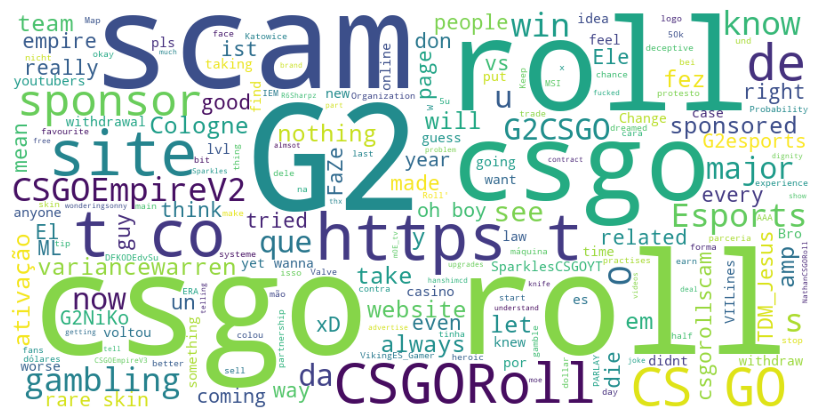

In [15]:
# Create DataFrame "all_tweets" with "text" data from "tweets_final" DataFrame - assign string data type
all_tweets = ' '.join(tweets_final['full_text'].astype(str))

# Create the WordCloud using data from "all_tweets", including the plot width, the plot height and the plot background colour 
textwordcloud = WordCloud(width=900,
                          height=450,
                          background_color='white').generate(all_tweets)

# Plot the WorldCloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(textwordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the WordCloud figure
plt.show()

Producing a WordCloud gives us a visual representation of the amount each word in the "full_text" column in our DataFrame is being said.

In [16]:
# Create text hover template
scatterhover = ('<b>Name:</b> ' + tweets_final['username'].astype(str) + '<br>' +
                '<b>User Location:</b> ' + tweets_final['location'].astype(str) + '<br>' +
                '<b>Verified?</b> ' + tweets_final['verified'].astype(str) + '<br>' +
                '<b>Date:</b> ' + tweets_final['created_at'].astype(str) + '<br>' +
                '<b>Tweet:</b> ' + tweets_final['full_text'].astype(str)
)

# Create a Scatter map figure with data for Locations of G2/CSGO Roll-related Tweets
scattermap = go.Figure(go.Scattermapbox(lat=tweets_final['geometry'].y,
                                        lon=tweets_final['geometry'].x,
                                        mode='markers',
                                        marker=dict(size=7.5,
                                                    colorscale='sunset',
                                                    opacity=0.8,
                                                    symbol='circle'),
                                        text=scatterhover)
)

# Set the layout of the Scatter map figure, including the title, the map attributes, the plot height and the plot width
scattermap.update_layout(title='Locations of G2/CSGO Roll-related Tweets',
                         mapbox=dict(style='carto-positron',
                                     center=dict(lat=tweets_final['geometry'].y.median(),
                                                 lon=tweets_final['geometry'].x.median()),
                                     zoom=0.5),
                         height=650,
                         width=900
)

# Show the Scatter map figure
scattermap.show()

Here we use a Scatter map. The scatter map is a visual representation of the geographical distribution of tweets related to the G2/CSGORoll sponsorship. Using the Plotly library, and the Mapbox API, markers are placed on the map that correspond to the approximate location of each tweet and where it originated from. The map uses the 'carto-positron' Mapbox style, and uses the latitude and longitude coordinates, which are derived from the 'geometry' column in the dataset, to plot each tweet. This enables the scatter map to accurately position each tweet on a map of the world, providing a bird's-eye view of the global conversation around the sponsorship.

In [17]:
tweets_final['polarity']=0.0
tweets_final['subjectivity']=0.0

for i, row in tweets_final.iterrows():
    text = row['full_text']

    blob = TextBlob(text)
    
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    tweets_final.at[i, 'polarity'] = polarity
    tweets_final.at[i, 'subjectivity'] = subjectivity

In [18]:
display(tweets_final.loc[:, ['username', 'polarity', 'subjectivity']].head())

,username,polarity,subjectivity
0,fyta_ow,-0.041667,0.5
1,Al_Azawi987,0.200000,0.2
2,mostafa_xxxx,-0.600000,0.7
3,335ie90_,0.000000,0.5
4,TONYWINS34,0.400000,0.8


In [19]:
# Create text hover template to be used in future plots
sentimenthover = ('<b>Name:</b> ' + tweets_final['username'].astype(str) + '<br>' +
                  '<b>User Location:</b> ' + tweets_final['location'].astype(str) + '<br>' +
                  '<b>Verified?</b> ' + tweets_final['verified'].astype(str) + '<br>' +
                  '<b>Date:</b> ' + tweets_final['created_at'].astype(str) + '<br>' +
                  '<b>Tweet:</b> ' + tweets_final['full_text'].astype(str) +
                  '<b>Polarity:</b> ' + tweets_final['polarity'].astype(str) + '<br>' +
                  '<b>Subjectivity:</b> ' + tweets_final['subjectivity'].astype(str)
)

Sentiment analysis is a powerful tool that can help us understand the emotions and attitudes of people on social media towards the G2/CSGORoll sponsorship. To perform sentiment analysis on the tweets dataset, we use the TextBlob library, a popular natural language processing tool in Python. TextBlob offers a range of features for text analysis, including sentiment analysis, which allows us to determine the positivity or negativity of a text, as well as the degree of personal opinion or emotion expressed.

To calculate the Polarity and Subjectivity values for each tweet, we apply sentiment analysis to the text of each tweet. Polarity ranges from -1 to 1 and reflects the degree of positivity or negativity of a text, with 0 being neutral. Subjectivity ranges from 0 to 1 and reflects the degree of personal opinion or emotion expressed in a text, with 0 being objective and 1 being highly subjective.

Sentiment analysis is not perfect, however. This is due to computers not having the ability to accurately detect sarcasm or irony, or to account for cultural or linguistic differences in the training data.

##### Polarity

In [20]:
# Create a Histogram figure with data for Polarity of G2/CSGO Roll-related Tweets
polhist=px.histogram(tweets_final,
                     x='polarity',
                     nbins=20,
                     title='Polarity of G2/CSGORoll-related Tweets',
                     width=900)

# Show the Histogram figure
polhist.show()

Using a histogram, from the Plotly library, specifically Plotly Express, we can visualise the polarity data from the sentiment analysis we applied to the dataset. The histogram is skewed towards the center, with the majority of the tweets having a polarity score of 0, indicating a neutral sentiment towards the G2/CSGORoll sponsorship. The histogram also shows that there are a small number of tweets with a negative polarity score (less than 0) and some tweets with a positive polarity score (greater than 0), indicating mixed sentiments among some Twitter users regarding the sponsorship. Overall, the histogram provides a clear representation of the sentiment distribution among Twitter users in relation to the G2/CSGORoll sponsorship.

In [21]:
# Create a Scatter map figure with data for Polarity of G2/CSGO Roll-related Tweets
polmap = go.Figure(go.Scattermapbox(lat=tweets_final['geometry'].y,
                                    lon=tweets_final['geometry'].x,
                                    mode='markers',
                                    marker=dict(size=7.5,
                                                color=tweets_final['polarity'],
                                                colorscale='sunset',
                                                opacity=0.7,
                                                colorbar=dict(title='Polarity')),
                                    text=sentimenthover)
)

# Set the layout of the Scatter map figure, including the title, the map attributes, the plot height and the plot width
polmap.update_layout(title='Polarity of G2/CSGORoll-related Tweets',
                     mapbox=dict(style='carto-positron',
                                 center=dict(lat=tweets_final['geometry'].y.median(),
                                             lon=tweets_final['geometry'].x.median()),
                                 zoom=0.5),
                     height=650,
                     width=900
)

# Show the Scatter map figure
polmap.show()

Using a Scatter map again, we visualise the geographical distribution of the polarity data from tweets related to the G2/CSGORoll sponsorship. Using the Plotly library, and the Mapbox API, markers are placed on the map that correspond to the approximate location of each tweet and where it originated from. The 'carto-positron' Mapbox style is used to provide a clear background, and uses the latitude and longitude coordinates, which are derived from the 'geometry' column in the dataset, to plot each tweet. The markers are colored using the 'sunset' colorscale, which ranges from yellow to purple to represent negative and positive polarity, respectively. This helps to quickly identify areas of high negative or positive sentiment in the tweets and provides a broad overview of the global opinion of the G2/CSGORoll sponsorship on Twitter.

##### Subjectivity

In [22]:
# Create a Histogram figure with data for Subjectivity of G2/CSGO Roll-related Tweets
subhist=px.histogram(tweets_final,
                     x='subjectivity',
                     nbins=20,
                     title='Subjectivity of G2/CSGORoll-related Tweets',
                     width=900)

# Show the Histogram figure
subhist.show()

Using a histogram again, we can visualize the subjectivity data from the sentiment analysis we applied to the dataset. The histogram shows that the majority of tweets have a subjectivity score of 0, indicating an objective tone towards the G2/CSGORoll sponsorship. There are a handful of tweets with fair to high subjectivity scores, indicating a more personal or emotional tone. Overall, the histogram provides a clear representation of the subjectivity distribution among Twitter users in relation to the G2/CSGORoll sponsorship.

In [23]:
# Create a Scatter map figure with data for Subjectivity of G2/CSGO Roll-related Tweets
submap = go.Figure(go.Scattermapbox(lat=tweets_final['geometry'].y,
                                    lon=tweets_final['geometry'].x,
                                    mode='markers',
                                    marker=dict(size=7.5,
                                                color=tweets_final['subjectivity'],
                                                colorscale='sunset',
                                                opacity=0.7,
                                                colorbar=dict(title='Subjectivity')),
                                    text=sentimenthover)
)

# Set the layout of the Scatter map figure, including the title, the map attributes, the plot height and the plot width
submap.update_layout(title='Subjectivity of G2/CSGORoll-related Tweets',
                     mapbox=dict(style='carto-positron',
                                 center=dict(lat=tweets_final['geometry'].y.median(),
                                             lon=tweets_final['geometry'].x.median()),
                                 zoom=0.5),
                     height=650,
                     width=900
)

# Show the Scatter map figure
submap.show()

Using a Scatter map again, we visualise the geographical distribution of the subjectivity data from tweets related to the G2/CSGORoll sponsorship. Using the Plotly library, and the Mapbox API, markers are placed on the map that correspond to the approximate location of each tweet and where it originated from. The 'carto-positron' Mapbox style is used to provide a clear background, and uses the latitude and longitude coordinates, which are derived from the 'geometry' column in the dataset, to plot each tweet. The markers are colored using the 'sunset' colorscale, which ranges from yellow to purple to represent objectivity and subjectivity, respectively.

In [24]:
tweets_countrypre=tweets_final[tweets_final['lat'].notna()]
tweets_countrypre.head()

,tweet_id,username,full_name,full_text,view_count,bookmark_count,favorite_count,reply_count,retweet_count,quote_count,...,avatar_url,verified,is_blue_verified,user_created_at,acc_location,lat,lon,geometry,polarity,subjectivity
0,1.679560e+18,fyta_ow,fyta,@hanshimcd @wonderingsonny @CSGOEmpireV2 @Spar...,160,0,0,1,0,0,...,https://pbs.twimg.com/profile_images/170564242...,False,False,24/12/2020,"(Nanno, Ville d'Anaunia, Comunità della Val di...",46.314475,11.048029,POINT (11.04803 46.31448),-0.041667,0.5
2,1.679540e+18,mostafa_xxxx,KING,@CSGOEmpireV2 @CSGORoll @CSGOEmpireV3 I wanna ...,61,0,0,0,0,0,...,https://pbs.twimg.com/profile_images/151248044...,False,False,16/02/2013,"(دبي, الإمارات العربية المتحدة, دبي, (25.07428...",25.074282,55.188539,POINT (55.18854 25.07428),-0.600000,0.7
3,1.639810e+18,335ie90_,Daveeeeeeeeeeeeeee,@R6Sharpz Csgo roll is such a scam. All online...,99,0,1,0,0,0,...,https://pbs.twimg.com/profile_images/163860614...,False,False,24/02/2022,"(Alabama, United States, (33.2588817, -86.8295...",33.258882,-86.829534,POINT (-86.82953 33.25888),0.000000,0.5
4,8.751810e+17,TONYWINS34,Tony Huynh,@NathanCSGORoll #csgorollscam\nDon't do free k...,0,0,0,0,0,0,...,https://pbs.twimg.com/profile_images/126351237...,False,False,13/04/2014,"(Burlington, Chittenden County, Vermont, Unite...",44.476160,-73.212906,POINT (-73.21291 44.47616),0.400000,0.8
5,8.847810e+17,boptilltheydrop,bop,@m0E_tv thx moe for telling me csgo roll isnt ...,0,0,0,0,0,0,...,https://abs.twimg.com/sticky/default_profile_i...,False,False,11/07/2017,"(Nanno, Ville d'Anaunia, Comunità della Val di...",46.314475,11.048029,POINT (11.04803 46.31448),0.000000,0.0


In [25]:
def get_country(lat, lon):
    location = geolocator.reverse((lat, lon), exactly_one=True)
    if location is None:
        return None
    elif 'country' not in location.raw['address']:
        return None
    else:
        return location.raw['address']['country']

tweets_final['country'] = tweets_countrypre.apply(lambda row: get_country(row['lat'], row['lon']), axis=1)
tweets_final.head()

,tweet_id,username,full_name,full_text,view_count,bookmark_count,favorite_count,reply_count,retweet_count,quote_count,...,verified,is_blue_verified,user_created_at,acc_location,lat,lon,geometry,polarity,subjectivity,country
0,1.679560e+18,fyta_ow,fyta,@hanshimcd @wonderingsonny @CSGOEmpireV2 @Spar...,160,0,0,1,0,0,...,False,False,24/12/2020,"(Nanno, Ville d'Anaunia, Comunità della Val di...",46.314475,11.048029,POINT (11.04803 46.31448),-0.041667,0.5,Italia
1,1.690790e+18,Al_Azawi987,Al_Toxic,@G2CSGO Can you show us the csgorollscam contr...,463,0,0,0,0,0,...,False,False,05/08/2016,None,NaN,NaN,POINT EMPTY,0.200000,0.2,NaN
2,1.679540e+18,mostafa_xxxx,KING,@CSGOEmpireV2 @CSGORoll @CSGOEmpireV3 I wanna ...,61,0,0,0,0,0,...,False,False,16/02/2013,"(دبي, الإمارات العربية المتحدة, دبي, (25.07428...",25.074282,55.188539,POINT (55.18854 25.07428),-0.600000,0.7,الإمارات العربية المتحدة
3,1.639810e+18,335ie90_,Daveeeeeeeeeeeeeee,@R6Sharpz Csgo roll is such a scam. All online...,99,0,1,0,0,0,...,False,False,24/02/2022,"(Alabama, United States, (33.2588817, -86.8295...",33.258882,-86.829534,POINT (-86.82953 33.25888),0.000000,0.5,United States
4,8.751810e+17,TONYWINS34,Tony Huynh,@NathanCSGORoll #csgorollscam\nDon't do free k...,0,0,0,0,0,0,...,False,False,13/04/2014,"(Burlington, Chittenden County, Vermont, Unite...",44.476160,-73.212906,POINT (-73.21291 44.47616),0.400000,0.8,United States


To further enhance the geographical information for each tweet, we used Nominatim once again, this time to obtain the country that each tweet originated from. We did this by utilizing the 'Lat' and 'Lon' columns that were generated the previous time we used Nominatim. The 'get_country' function was created to take the latitude and longitude coordinates of each tweet and reverse geocode them using Nominatim to retrieve the corresponding country. This function was then applied to each row of the dataframe, which resulted in a new 'country' column being added to the dataframe that contains the country name for each tweet.

If code produces "KeyError: 'country'", run notebook from scratch. Reason why code produces "KeyError: 'country'" every now and then is unknown. It is possibly caused by one of the values in "user_location" column in "tweets_final".

In [26]:
translate_client = translate.Client()

def translate_text(text, target_language):
    result = translate_client.translate(text, target_language=target_language)
    return result['translatedText']

tweets_final['country'] = tweets_final['country'].apply(lambda x: translate_text(x, 'en') if isinstance(x, str) and len(x) > 0 else x)
tweets_final.head()

,tweet_id,username,full_name,full_text,view_count,bookmark_count,favorite_count,reply_count,retweet_count,quote_count,...,verified,is_blue_verified,user_created_at,acc_location,lat,lon,geometry,polarity,subjectivity,country
0,1.679560e+18,fyta_ow,fyta,@hanshimcd @wonderingsonny @CSGOEmpireV2 @Spar...,160,0,0,1,0,0,...,False,False,24/12/2020,"(Nanno, Ville d'Anaunia, Comunità della Val di...",46.314475,11.048029,POINT (11.04803 46.31448),-0.041667,0.5,Italy
1,1.690790e+18,Al_Azawi987,Al_Toxic,@G2CSGO Can you show us the csgorollscam contr...,463,0,0,0,0,0,...,False,False,05/08/2016,None,NaN,NaN,POINT EMPTY,0.200000,0.2,NaN
2,1.679540e+18,mostafa_xxxx,KING,@CSGOEmpireV2 @CSGORoll @CSGOEmpireV3 I wanna ...,61,0,0,0,0,0,...,False,False,16/02/2013,"(دبي, الإمارات العربية المتحدة, دبي, (25.07428...",25.074282,55.188539,POINT (55.18854 25.07428),-0.600000,0.7,The United Arab Emirates
3,1.639810e+18,335ie90_,Daveeeeeeeeeeeeeee,@R6Sharpz Csgo roll is such a scam. All online...,99,0,1,0,0,0,...,False,False,24/02/2022,"(Alabama, United States, (33.2588817, -86.8295...",33.258882,-86.829534,POINT (-86.82953 33.25888),0.000000,0.5,United States
4,8.751810e+17,TONYWINS34,Tony Huynh,@NathanCSGORoll #csgorollscam\nDon't do free k...,0,0,0,0,0,0,...,False,False,13/04/2014,"(Burlington, Chittenden County, Vermont, Unite...",44.476160,-73.212906,POINT (-73.21291 44.47616),0.400000,0.8,United States


In order to make the country names more accessible to English-speaking individuals, we utilised Google Cloud's Translation API to translate the non-English country names obtained from the previous Nominatim run into English. This translation process was applied specifically to the 'country' column, which allowed us to overwrite the previous values with their English equivalents. By doing so, we were able to ensure that the English version of the country names were readily available for future use.

In [27]:
tweetsmerged=pd.merge(world, tweets_final, on="country")
tweetsmerged.head()

,country,country code,tweet_id,username,full_name,full_text,view_count,bookmark_count,favorite_count,reply_count,...,avatar_url,verified,is_blue_verified,user_created_at,acc_location,lat,lon,geometry,polarity,subjectivity
0,Canada,CAN,8.605850e+17,CrunchyyTaco,Crunchy,@VictorSvane @CSGORoll He tried to scam me wit...,0,0,0,0,...,https://pbs.twimg.com/profile_images/859793742...,False,False,03/05/2017,"(Central Ontario, Ontario, Canada, Kawartha La...",44.575616,-78.848603,POINT (-78.84860 44.57562),0.027778,0.180556
1,Canada,CAN,1.660410e+18,Timi7272,Timi,@bibanator Die Schlange bei csgo roll (bzw g2)...,1923,0,7,0,...,https://pbs.twimg.com/profile_images/165846257...,False,False,09/12/2016,"(2, Sand Dust Lane, Seguin Township, Parry Sou...",45.300575,-79.946399,POINT (-79.94640 45.30058),0.000000,0.000000
2,Argentina,ARG,1.574750e+18,dlcofficial,IamDLC,@Cti9001 @Nuubzaum @nocabcs @Thunder_Dovah @No...,0,0,0,0,...,https://pbs.twimg.com/profile_images/165162685...,False,False,14/07/2020,"(Mirage, Tandil, Partido de Tandil, Buenos Air...",-37.312578,-59.158166,POINT (-59.15817 -37.31258),0.000000,0.750000
3,Argentina,ARG,7.954010e+17,nvRcsgo,nvr,@VikingES_Gamer Viking acabo de sacar un cuchi...,0,0,0,0,...,https://pbs.twimg.com/profile_images/151949920...,False,False,02/09/2013,"(Rosario, Municipio de Rosario, Gran Rosario, ...",-32.959361,-60.661702,POINT (-60.66170 -32.95936),0.000000,0.000000
4,Chile,CHL,8.399170e+17,sfdxpro,SfdxShow,Atención Scam!! El 95% de las webs que tengan ...,0,0,81,13,...,https://pbs.twimg.com/profile_images/907282735...,False,True,03/01/2015,"(Planeta Tierra, Población Martín, Monte León ...",-36.534190,-72.087854,POINT (-72.08785 -36.53419),0.000000,0.000000


By extracting the country name of each tweet from the 'location' column using Nominatim, we were able to create a new column with the country name for each tweet, called 'country'. With this information available, we were able to merge our dataset with the 'world' dataset. The 'world' dataset contains information on each country around the world, including their country code, which is what both datasets were merged on. This allowed us to plot our data onto a choropleth map, a type of map that displays data in differerent shades of color on predefined geographical regions. This made it possible to visualise and analyse data like averages, distribution, and other patterns on a global scale.

In [28]:
tweetsmerged['country code'] = tweetsmerged['country code'].astype(str)
avg_polarity = tweetsmerged.groupby(['country', 'country code'])['polarity'].mean().reset_index()
avg_polarity

,country,country code,polarity
0,Argentina,ARG,0.000000
1,Australia,AUS,0.112500
2,Austria,AUT,0.300000
3,Bulgaria,BGR,-0.178571
4,Canada,CAN,0.013889
5,Chile,CHL,0.000000
6,Denmark,DNK,0.650000
7,France,FRA,0.250000
8,Germany,DEU,0.127579
9,India,IND,0.071528


In [29]:
tweetsmerged['country code'] = tweetsmerged['country code'].astype(str)
avg_subjectivity = tweetsmerged.groupby(['country', 'country code'])['subjectivity'].mean().reset_index()
avg_subjectivity

,country,country code,subjectivity
0,Argentina,ARG,0.375000
1,Australia,AUS,0.762500
2,Austria,AUT,0.900000
3,Bulgaria,BGR,0.616667
4,Canada,CAN,0.090278
5,Chile,CHL,0.000000
6,Denmark,DNK,0.644444
7,France,FRA,0.250000
8,Germany,DEU,0.649802
9,India,IND,0.287500


Having merged the data from the 'world' and 'tweets_final' datasets to create 'tweetsmerged', we could use the polarity and subjectivity data we obtained through TextBlob sentiment analysis, to calculate the mean polarity and subjectivity for each country. This calculated data can then be plotted on a choropleth map, which is achieved by leveraging the country code information in our dataset. By providing Plotly with the country code data, we can indicate where on the choropleth map the polarity or subjectivity data is plotted.

Plotting the mean polarity and subjectivity for each country can provide valuable insights into the overall sentiment of Twitter users in different regions of the world. By aggregating sentiment data on a country level, we can identify patterns and trends in public opinion that may be relevant to executives, tournament officials, and other organisations operating in those regions. For example, positive sentiment towards a certain topic or product in a particular country could indicate a potential market opportunity. Similarly, negative sentiment towards a particular issue could signal a need for further investigation or action. Additionally, mapping sentiment data can help visualize the distribution of sentiment across different regions, allowing for easier comparison and analysis.

Overall, plotting the mean polarity and subjectivity for each country can provide a useful tool for understanding and interpreting public sentiment towards the G2/CSGORoll sponsorship on a global scale, enabling decision-makers to take appropriate actions based on the insights gained.

In [30]:
# Create text hover template
avgpolhover = ('<b>Country:</b> ' + avg_polarity['country'].astype(str) + '<br>' +
               '<b>Country Code:</b> ' + avg_polarity['country code'].astype(str) + '<br>' +
               '<b>Polarity:</b> ' + '%{z:.3f}' + '<extra></extra>'
)

# Create a Choropleth figure with data for Polarity of G2/CSGO Roll-related Tweets by Country
avgpolmap = go.Figure(go.Choropleth(locations = avg_polarity['country code'],
                                    z = avg_polarity['polarity'],
                                    hovertemplate = avgpolhover,
                                    colorscale = 'sunset',
                                    marker_line_color='gray',
                                    marker_line_width=0.2,
                                    colorbar_title = 'Polarity',
                                    colorbar=dict(orientation='h'))
)

# Set the layout of the Choropleth figure, including the title, the plot width and the map attributes
avgpolmap.update_layout(title_text='Polarity of G2/CSGORoll-related Tweets by Country',
                        width=900,
                        geo=dict(showframe=False,
                                 showcoastlines=False)
)

# Show the Choropleth figure
avgpolmap.show()

With the average polarity data per country we calculated earlier, we can create a choropleth map that visualizes the overall sentiment of Twitter users towards the G2/CSGORoll sponsorship across different regions of the world. By leveraging the country code information in our dataset, we can plot the polarity data on the map and color each country based on its polarity score using a 'sunset' color scale. This color scale ranges from yellow to purple, representing positivity and negativity respectively. The choropleth map provides an easy-to-understand visualization of the distribution of sentiment across different regions and can help identify countries with particularly strong positive or negative sentiment towards the G2/CSGORoll sponsorship. This can be valuable for executives, tournament officials, and other organisations seeking to understand public opinion and tailor their strategies accordingly.

In [31]:
# Create text hover template
avgsubhover = ('<b>Country:</b> ' + avg_subjectivity['country'].astype(str) + '<br>' +
               '<b>Country Code:</b> ' + avg_subjectivity['country code'].astype(str) + '<br>' +
               '<b>Subjectivity:</b> ' + '%{z:.3f}' + '<extra></extra>'
)

# Create a Choropleth figure with data for Subjectivity of G2/CSGO Roll-related Tweets by Country
avgsubmap = go.Figure(go.Choropleth(locations = avg_subjectivity['country code'],
                                    z = avg_subjectivity['subjectivity'],
                                    hovertemplate = avgsubhover,
                                    colorscale = 'sunset',
                                    marker_line_color='gray',
                                    marker_line_width=0.2,
                                    colorbar_title = 'Subjectivity',
                                    colorbar=dict(orientation='h'))
)

# Set the layout of the Choropleth figure, including the title, the plot width and the map attributes
avgsubmap.update_layout(title_text='Subjectivity of G2/CSGORoll-related Tweets by Country',
                        width=900,
                        geo=dict(showframe=False,
                                showcoastlines=False)    
)

# Show the Choropleth figure
avgsubmap.show()

Using a choropleth map again, we can display the average subjectivity of tweets related to the G2/CSGORoll sponsorship in each country. Ranging from 0 (displayed in yellow) to 1 (displayed in purple), the colors, using the 'sunset' colorscale, on the map provide a visual representation of the overall sentiment towards the sponsorship in different regions of the world. By analyzing the patterns and trends in subjectivity data, we can gain insights into how people are feeling about the G2/CSGORoll sponsorship across different countries. This information can be useful for executives, tournament officials, and other organisations to develop targeted interventions and messaging strategies that address specific concerns or issues related to the sponsorship in different regions. Overall, this map can serve as a valuable tool for understanding the public sentiment towards the G2/CSGORoll sponsorship on a global scale.

Narrowing down the average visualisations to regions, states, or cities is possible with further data refinement using Nominatim, however, due to time constraints, a working version was not included in this notebook.